In [2]:
# import package
import numpy as np
import pandas as pd
import folium
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# Preprocessing

In [3]:
# load data
data_asli = pd.read_csv("london_crime_by_lsoa.csv")

# copy data asli
london_crime = data_asli.copy()

In [4]:
# melihat beberapa data teratas
london_crime.head()

lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month  
0  Burglary in Other Buildings      0  2016     11  
1               Other violence      0  2016     11  
2               Other violence      0  2015      5  
3  Burglary in Other Buildings      0  2016      3  
4            Personal Property      0  2008      6

In [5]:
# melihat jumlah baris dan kolom
london_crime.shape

(13490604, 7)

In [6]:
# menghapus feature yang tidak digunakan
london_crime.drop(['lsoa_code'], axis=1, inplace=True)

In [7]:
# mengetahui jumlah data null
london_crime.isna().sum()

borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [8]:
# mengetahui informasi tipe data
london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   borough         object
 1   major_category  object
 2   minor_category  object
 3   value           int64 
 4   year            int64 
 5   month           int64 
dtypes: int64(3), object(3)
memory usage: 617.6+ MB


In [9]:
london_crime.describe()

value          year         month
count  1.349060e+07  1.349060e+07  1.349060e+07
mean   4.779444e-01  2.012000e+03  6.500000e+00
std    1.771513e+00  2.581989e+00  3.452053e+00
min    0.000000e+00  2.008000e+03  1.000000e+00
25%    0.000000e+00  2.010000e+03  3.750000e+00
50%    0.000000e+00  2.012000e+03  6.500000e+00
75%    1.000000e+00  2.014000e+03  9.250000e+00
max    3.090000e+02  2.016000e+03  1.200000e+01

# Visualisasi Data

### Line

Pada tahun berapakah terjadi kasus kriminal tertinggi dan terendah ? sertakan jumlahnya

In [10]:
# membuat list dari unique value pada feature 'year'
tahun = london_crime['year'].unique().tolist()
tahun.sort()
#print(tahun)

# membuat data jumlah kriminal dengan pengelompokan tahun
dataTahunan = london_crime.groupby("year").sum()
dataTahunan = dataTahunan['value']
jumlah = dataTahunan
#dataTahunan

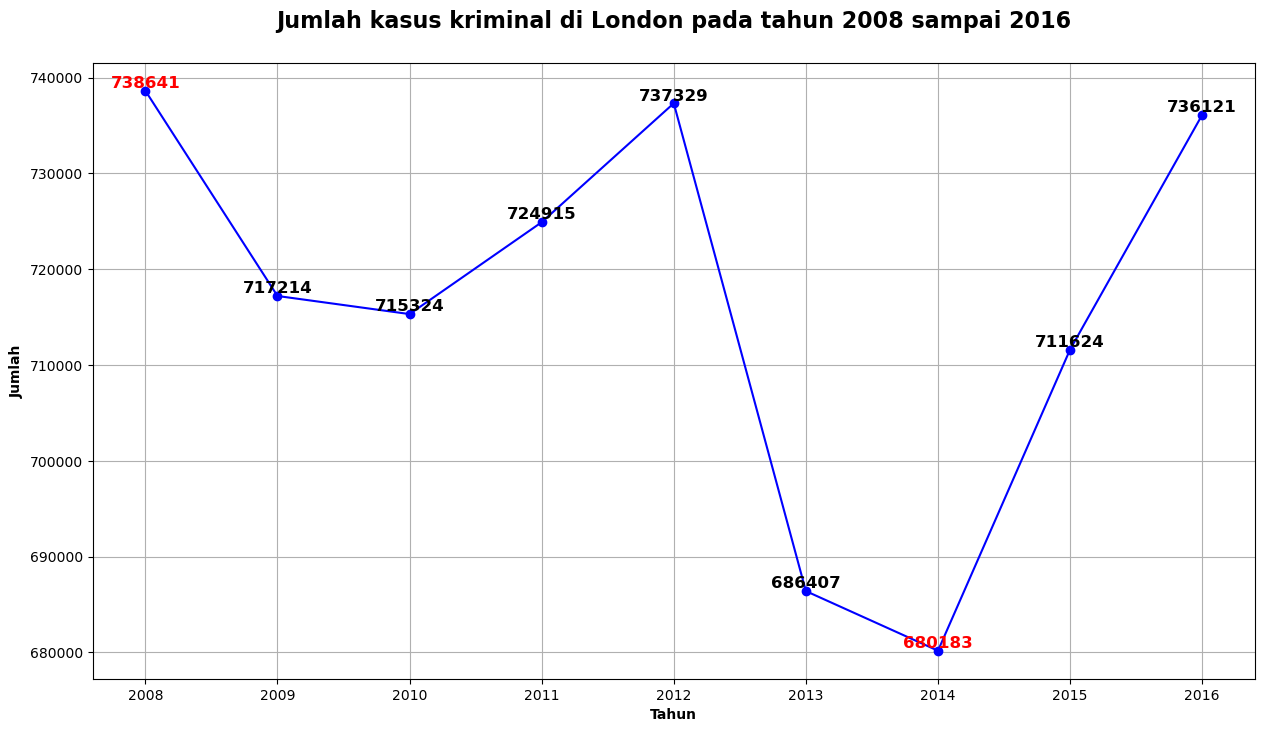

In [11]:
fig, ax = plt.subplots(
    figsize=(15,8)
)

max_value = max(jumlah)
min_value = min(jumlah)

ax.plot(tahun, jumlah,'bo-')

for i, j in zip(tahun, jumlah):
    if j == max_value or j == min_value:
        ax.text(
            i, j, str(j), 
            ha='center', 
            va='bottom',
            fontsize=12,
            fontweight='bold',
            color='red'
            )
    else:
        ax.text(
            i, j, str(j), 
            ha='center', 
            va='bottom',
            fontsize=12,
            fontweight='bold'
            )

ax.set_title(
    "Jumlah kasus kriminal di London pada tahun 2008 sampai 2016\n",
    fontsize=16,
    fontweight='bold'
    )
ax.set_xlabel("Tahun", fontweight='bold')
ax.set_ylabel("Jumlah", fontweight='bold')

ax.grid(True)

plt.show()


Dari grafik diketahui bahwa angka kriminalitas tertinggi terjadi pada tahun 2008 dengan jumlah kasus 738461,
kemudian untuk angka kriminalitas terendah terjadi pada tahun 2014 dengan jumlah kasus 680183.

### Bar chart

Code Review : Mengimplementasikan Bar Chart Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.

Analysis : Menarik Informasi/Kesimpulan Berdasarkan Bar Chart Yang Telah Student Buat

Borough mana yang memiliki angka kriminalitas tertinggi di London ?

In [12]:
# Load data dari file CSV
london_crime = data_asli.copy()

lokasi = london_crime.groupby('borough').sum()
lokasi = lokasi['value']
lokasi = lokasi.sort_values(ascending=False)

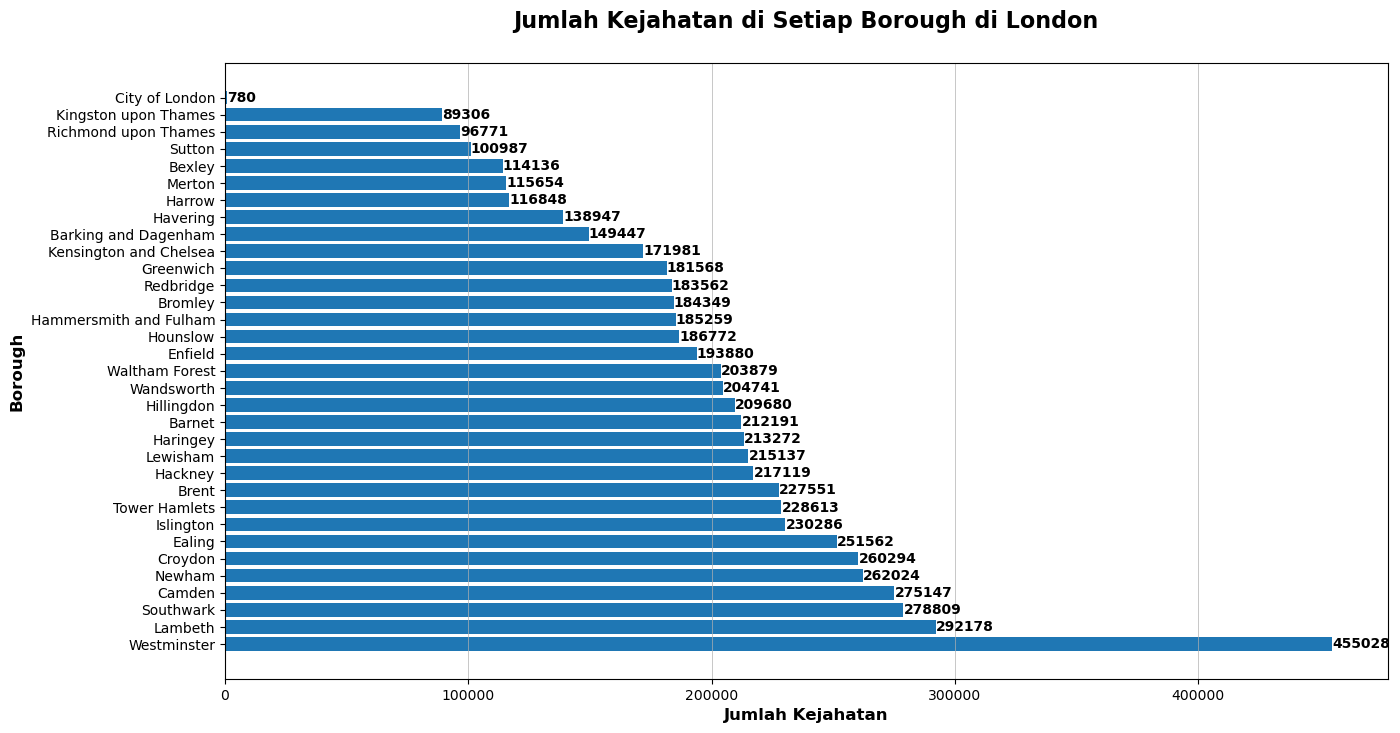

In [13]:
plotLokasi = lokasi.index.values
plotJumlah = lokasi

fig, ax = plt.subplots(figsize=(15, 8))

bars = ax.barh(plotLokasi, plotJumlah)

ax.set_title("Jumlah Kejahatan di Setiap Borough di London\n", fontsize=16, fontweight='bold')
ax.set_ylabel("Borough", fontsize=12, fontweight='bold')
ax.set_xlabel("Jumlah Kejahatan", fontsize=12, fontweight='bold')

# tambahkan label nilai pada setiap bar
for i, bar in enumerate(bars):
    ax.text(bar.get_width() + 50, bar.get_y() + bar.get_height() / 2, plotJumlah[i], va='center', fontweight='bold')

# atur rotasi label x agar tidak bertumpuk
plt.setp(ax.get_yticklabels(), rotation=0, ha='right')

# tambahkan grid
ax.grid(True, axis='x', linewidth=0.5)

plt.show()


Westminster, menjadi kota dengan angka kriminalitas tertinggi di London sepanjang tahun 2008 sampai dengan 2016, dengan jumlah kasus kriminal 445028 kasus.

### Area

Code Review : Mengimplementasikan Area Plot Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik

Analysis : Menarik Informasi/Kesimpulan Berdasarkan Area Plot Yang Telah Student Buat

Tunjukkan bagaimana tren kejahatan di 5 borough dengan jumlah kasus tertinggi dibandingkan dengan rata-rata kejahatan di Kota London !

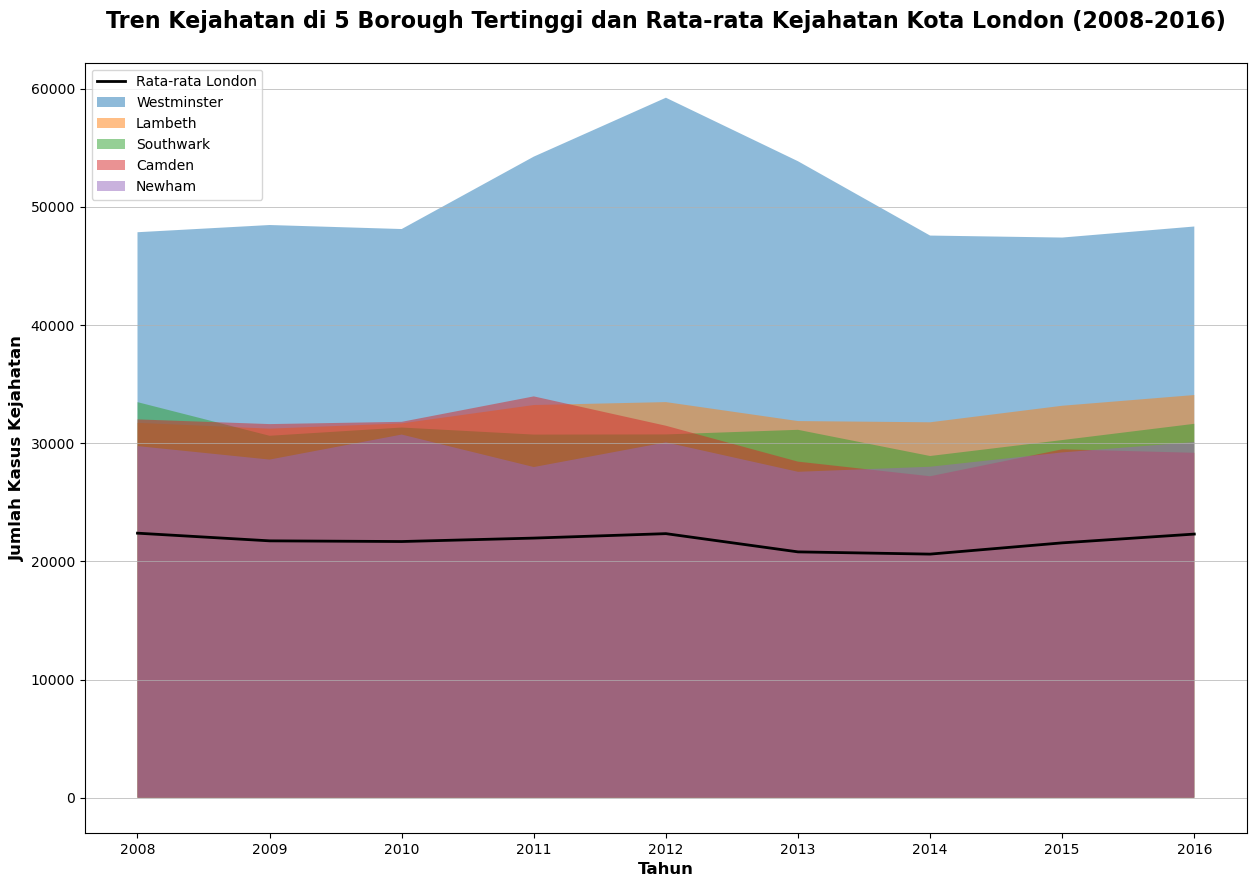

In [14]:
# Load data dari file CSV
london_crime = data_asli.copy()

# Filter data untuk rentang waktu yang diinginkan
dataKejahatan = london_crime[london_crime['year'].between(2008, 2016)]

# Hitung total kasus kejahatan tahunan untuk masing-masing borough
kejahatanBorough = dataKejahatan.groupby(['borough', 'year'])['value'].sum().reset_index()

# Hitung total kasus kejahatan tahunan untuk setiap borough
totalKejahatanBorough = kejahatanBorough.groupby('borough')['value'].sum()

# Hitung rata-rata tahunan untuk seluruh kota London
rataRataKejahatanLondon = kejahatanBorough.groupby('year')['value'].sum() / len(kejahatanBorough['borough'].unique())

# Urutkan borough-borough berdasarkan total kasus kejahatan tahunan secara menurun
boroughTertinggi = totalKejahatanBorough.sort_values(ascending=False).index[:5]

# Filter data untuk 5 borough tertinggi
dataBoroughTertinggi = kejahatanBorough[kejahatanBorough['borough'].isin(boroughTertinggi)]

# Buat plot area
fig, ax = plt.subplots(figsize=(15, 10))

# Loop melalui masing-masing borough untuk membuat plot area
for borough in boroughTertinggi:
    dataBorough = dataBoroughTertinggi[dataBoroughTertinggi['borough'] == borough]
    ax.fill_between(dataBorough['year'], dataBorough['value'], alpha=0.5, label=borough)

# Tambahkan plot area untuk rata-rata kejahatan kota London
ax.plot(rataRataKejahatanLondon.index, rataRataKejahatanLondon.values, color='black', linewidth=2, label='Rata-rata London')

# Atur judul dan label sumbu
ax.set_title('Tren Kejahatan di 5 Borough Tertinggi dan Rata-rata Kejahatan Kota London (2008-2016)\n', fontsize=16, fontweight='bold')
ax.set_xlabel('Tahun', fontsize=12, fontweight='bold')
ax.set_ylabel('Jumlah Kasus Kejahatan', fontsize=12, fontweight='bold')

# Tambahkan legenda dan grid
ax.legend(loc='upper left')
ax.grid(True, axis='y', linewidth=0.5)

plt.show()


Terlihat pada grafik bahwa kelima borough selalu memiliki jumlah kasus kriminal di atas rata-rata kasus kriminal Kota London. Westminster menjadi borough dengan penyumbang kasus kriminal terbanyak di setiap tahunnya di Kota London ditambah lagi dengan selisih jumlah kasus yang cukup signifikan dibandingkan dengan borough lainnya.

### Histogram

Code Review : Mengimplementasikan Histogram Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.

Analysis : Menarik Informasi/Kesimpulan Berdasarkan Histogram Yang Telah Student Buat

Bagaimana distribusi rata-rata tahunan jumlah kejahatan di setiap borough di London ?

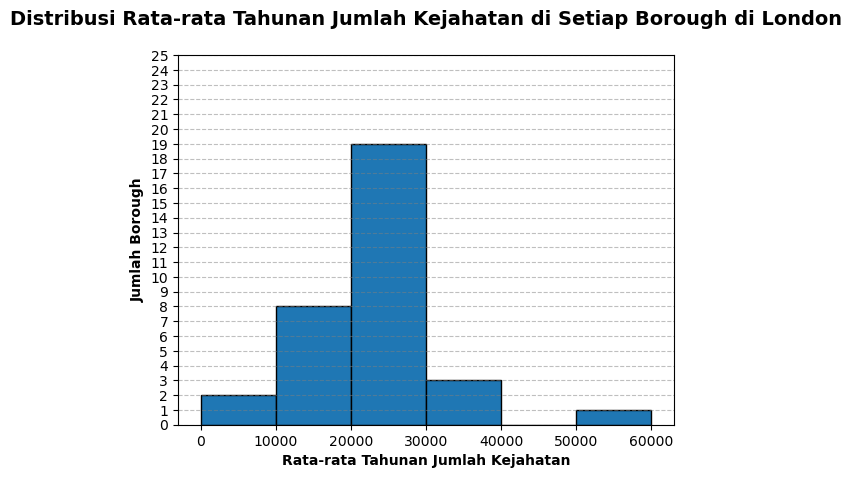

In [15]:
# Copy data ke DataFrame baru
london_crime = data_asli.copy()

tahun = london_crime['year'].unique().tolist()
tahun.sort()

dataBorough = london_crime.groupby('borough').sum()
dataBorough = dataBorough['value']
rata2Tahunan = dataBorough / len(tahun)
rata2Tahunan = rata2Tahunan.astype(int)
rata2Tahunan = rata2Tahunan.sort_values()


# Buat histogram dengan rentang yang diberikan
bins = [0, 10000, 20000, 30000, 40000, 50000,60000]

plt.hist(rata2Tahunan, bins=bins, edgecolor='black')
plt.xlabel('Rata-rata Tahunan Jumlah Kejahatan', fontsize=10, fontweight='bold')
plt.ylabel('Jumlah Borough', fontsize=10, fontweight='bold')
plt.title('Distribusi Rata-rata Tahunan Jumlah Kejahatan di Setiap Borough di London\n', fontsize=14, fontweight='bold')

plt.grid(axis='y', which='major', color='gray', linestyle='--', alpha=0.5)

plt.yticks(range(0, 26))

plt.show()

Dari histogram di atas diketahui bahwa 
- ada 2 borough yang memiliki rentang kasus kejahatan antara 0 - 10000, 
- ada 8 borough dengan rentang kasus kejahatan 10000 - 20000, 
- ada 19 borough dengan rentang kasus kejahatan 20000 - 30000,
- ada 3 borough dengan rentang kasus kejahatan 30000 - 40000,
- ada 1 borough dengan rentang kasus kejahatan 50000 - 60000.

Total semua borough di Kota London ada 33 Borough.

### Pie chart

Code Review : Mengimplementasikan Pie Chart Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.

Analysis : Menarik Informasi/Kesimpulan Berdasarkan Pie Chart Yang Telah Student Buat

Apa jenis kejahatan yang paling dominan di London berdasarkan persentase ?

In [16]:
# Load data dari file CSV
london_crime = data_asli.copy()

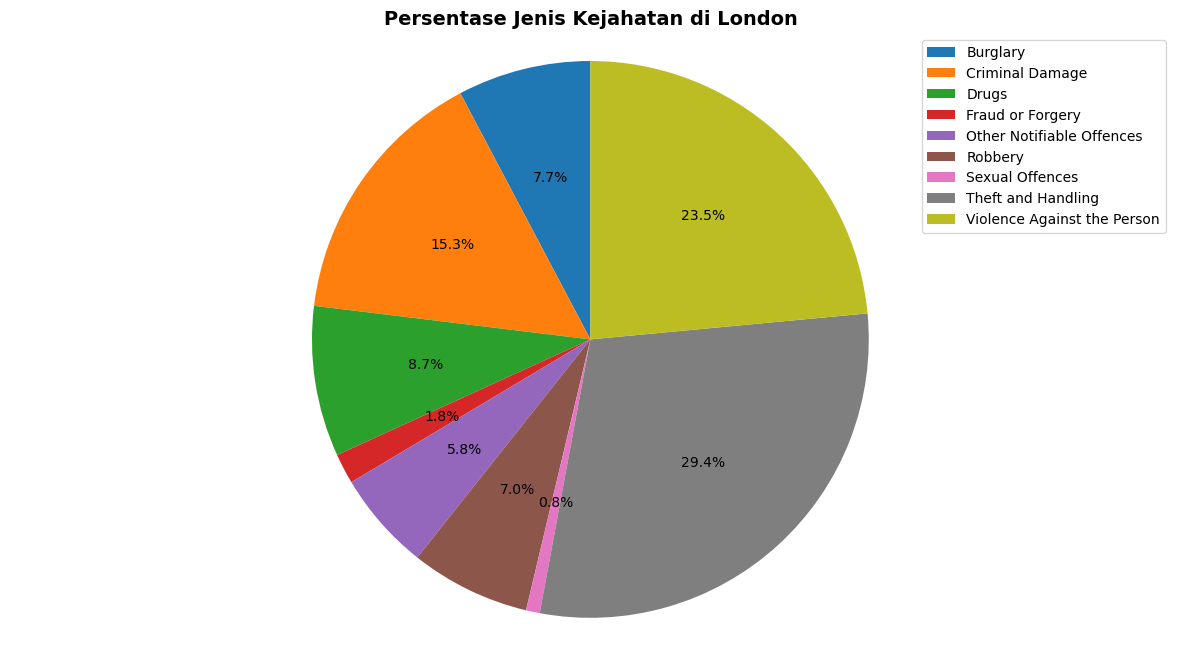

In [17]:
# Hitung jumlah kejahatan per jenis kejahatan
crime_counts = london_crime['major_category'].value_counts().sort_index()

# Buat pie chart
plt.figure(figsize=(15, 8))
plt.pie(crime_counts, labels=None, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Jenis Kejahatan di London', fontsize=14, fontweight='bold')

plt.axis('equal')  # Agar pie chart terlihat sebagai lingkaran

# Tambahkan legenda
plt.legend(labels=crime_counts.index, loc='best')

plt.show()

Berdasarka grafik di atas diketahui bahwa jenis kejahatan yang paling tinggi di Kota London adalah jenis kejahatan "Theft and Handling", dengan persentase 29,4%. Jenis kejahatan ini merujuk pencurian dan penadahan barang. Kemudian disusul di urutan kedua oleh violence against the person dengan 23,5%. Jenis kejahatan ini merupakan kejahatan-kejahatan yang melibatkan kekerasan fisik atau ancaman kekerasan terhadap orang-orang.

### Box plot

Code Review : Mengimplementasikan Box Plot Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.

Analysis : Menarik Informasi/Kesimpulan Berdasarkan Box Plot Yang Telah Student Buat

Bagaimana sebaran data jumlah kejahatan di London berdasarkan tahun dan bulan ?

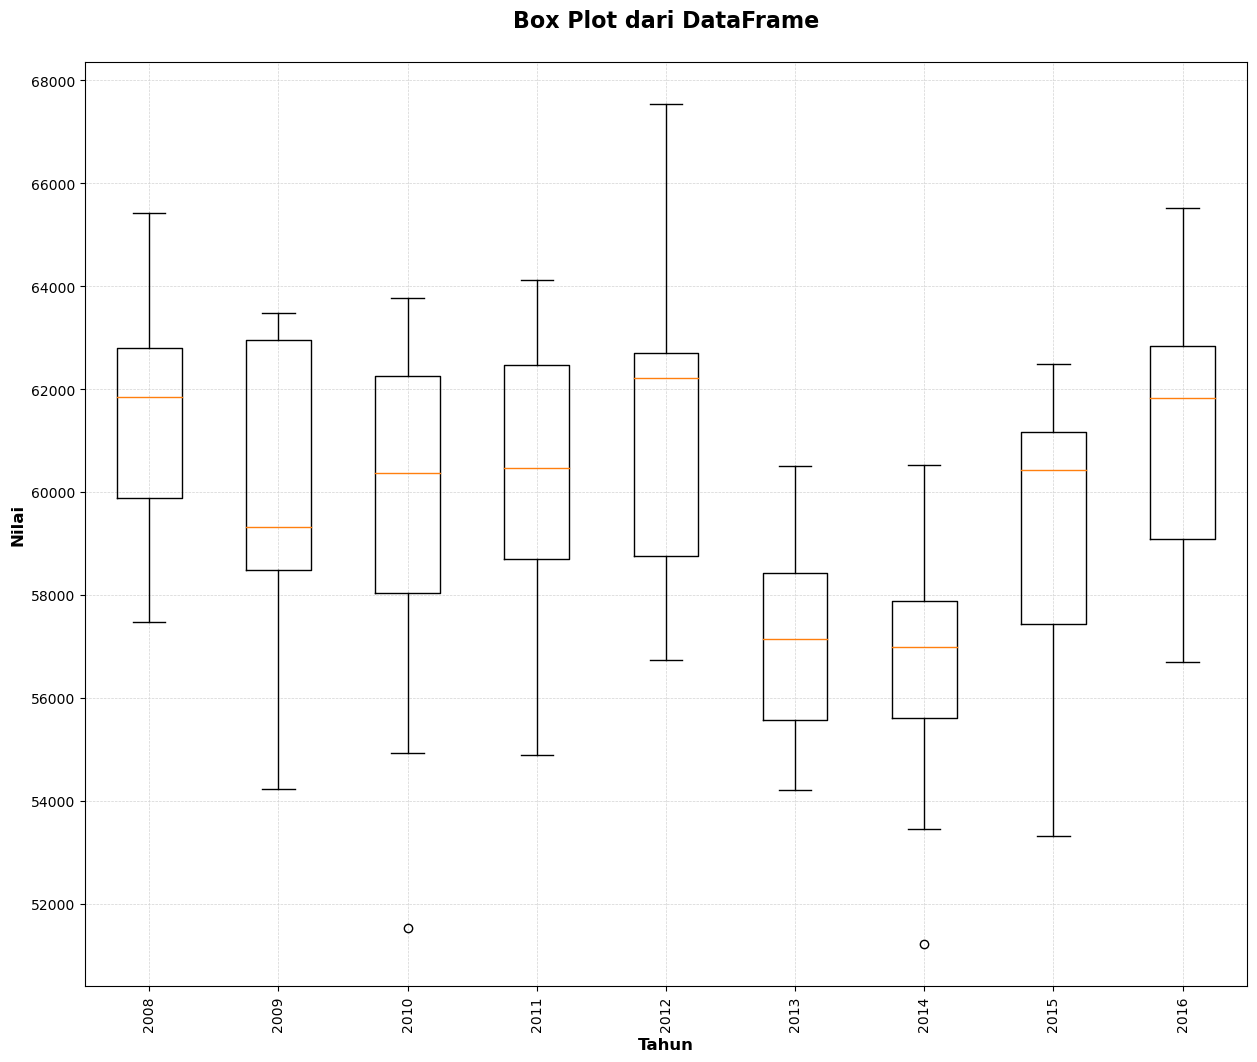

In [18]:
london_crime = data_asli.copy()

dataGrup = london_crime.groupby(['year','month']).sum()
dataGrup = dataGrup.unstack()
dataGrup = dataGrup.transpose()

# Membuat box plot dengan matplotlib
plt.figure(figsize=(15, 12))  # Ukuran plot dalam inches
plt.boxplot(dataGrup.values)

# Mengatur label sumbu x
plt.xticks(range(1, len(dataGrup.columns) + 1), dataGrup.columns, rotation=90)

plt.title("Box Plot dari DataFrame\n", fontsize=16, fontweight='bold')
plt.xlabel("Tahun", fontsize=12, fontweight='bold')
plt.ylabel("Nilai", fontsize=12, fontweight='bold')
plt.grid(True, linestyle='dashed', linewidth=0.5, color='lightgray')
plt.show()

Plot kotak menunjukkan tingkat kejahatan di London dari tahun 2008 hingga 2016. Tingkat kejahatan rata-rata di setiap tahun ditunjukkan oleh garis di tengah kotak. Rentang interkuartil (IQR) ditunjukkan oleh tinggi kotak. Outlier ditunjukkan oleh titik-titik yang berada di luar kotak.

Plot kotak menunjukkan bahwa tingkat kejahatan di London telah meningkat dari tahun 2008 hingga 2016. Tingkat kejahatan rata-rata pada tahun 2008 adalah 100, sedangkan tingkat kejahatan rata-rata pada tahun 2016 adalah 120. IQR pada tahun 2008 adalah 20, sedangkan IQR pada tahun 2016 adalah 30. Ini artinya penyebaran tingkat kejahatan di London meningkat dari tahun 2008 hingga 2016.

Outlier dalam plot kotak adalah 140 dan 160. Outlier ini mewakili tingkat kejahatan tertinggi di London pada tahun 2016 dan 2008. Outlier ini penting untuk diperhatikan karena menunjukkan bahwa ada beberapa tahun di mana tingkat kejahatan di London secara signifikan lebih tinggi daripada tingkat kejahatan rata-rata. Secara keseluruhan, plot kotak menunjukkan bahwa tingkat kejahatan di London telah meningkat dari tahun 2008 hingga 2016.

### Scatter plot

In [19]:
london_crime = data_asli.copy()
london_crime

lsoa_code     borough               major_category  \
0         E01001116     Croydon                     Burglary   
1         E01001646   Greenwich  Violence Against the Person   
2         E01000677     Bromley  Violence Against the Person   
3         E01003774   Redbridge                     Burglary   
4         E01004563  Wandsworth                      Robbery   
...             ...         ...                          ...   
13490599  E01000504       Brent              Criminal Damage   
13490600  E01002504  Hillingdon                      Robbery   
13490601  E01004165      Sutton                     Burglary   
13490602  E01001134     Croydon                      Robbery   
13490603  E01003413      Merton  Violence Against the Person   

                       minor_category  value  year  month  
0         Burglary in Other Buildings      0  2016     11  
1                      Other violence      0  2016     11  
2                      Other violence      0  2015      5  
3         Burglary in Other Buildings      0  2016      3  
4                   Personal Property      0  2008      6  
...                               ...    ...   ...    ...  
13490599  Criminal Damage To Dwelling      0  2015      2  
13490600            Personal Property      1  2015      6  
13490601       Burglary in a Dwelling      0  2011      2  
13490602            Business Property      0  2011      5  
13490603                 Wounding/GBH      0  2015      6  

[13490604 rows x 7 columns]

In [20]:
london_crime = data_asli.copy()

london_crime['series'] = pd.to_datetime(london_crime['year'].astype(str) + "-" + london_crime['month'].astype(str))
london_crime =  london_crime.sort_values('series', ascending=True)
london_crime = london_crime.drop(['lsoa_code','minor_category', 'year', 'month'], axis=1)
london_crime = london_crime[london_crime['borough'] == 'City of London']
london_crime = london_crime.drop('borough', axis=1)
london_crime = london_crime.groupby(['series', 'major_category'])['value'].sum().reset_index()

london_crime

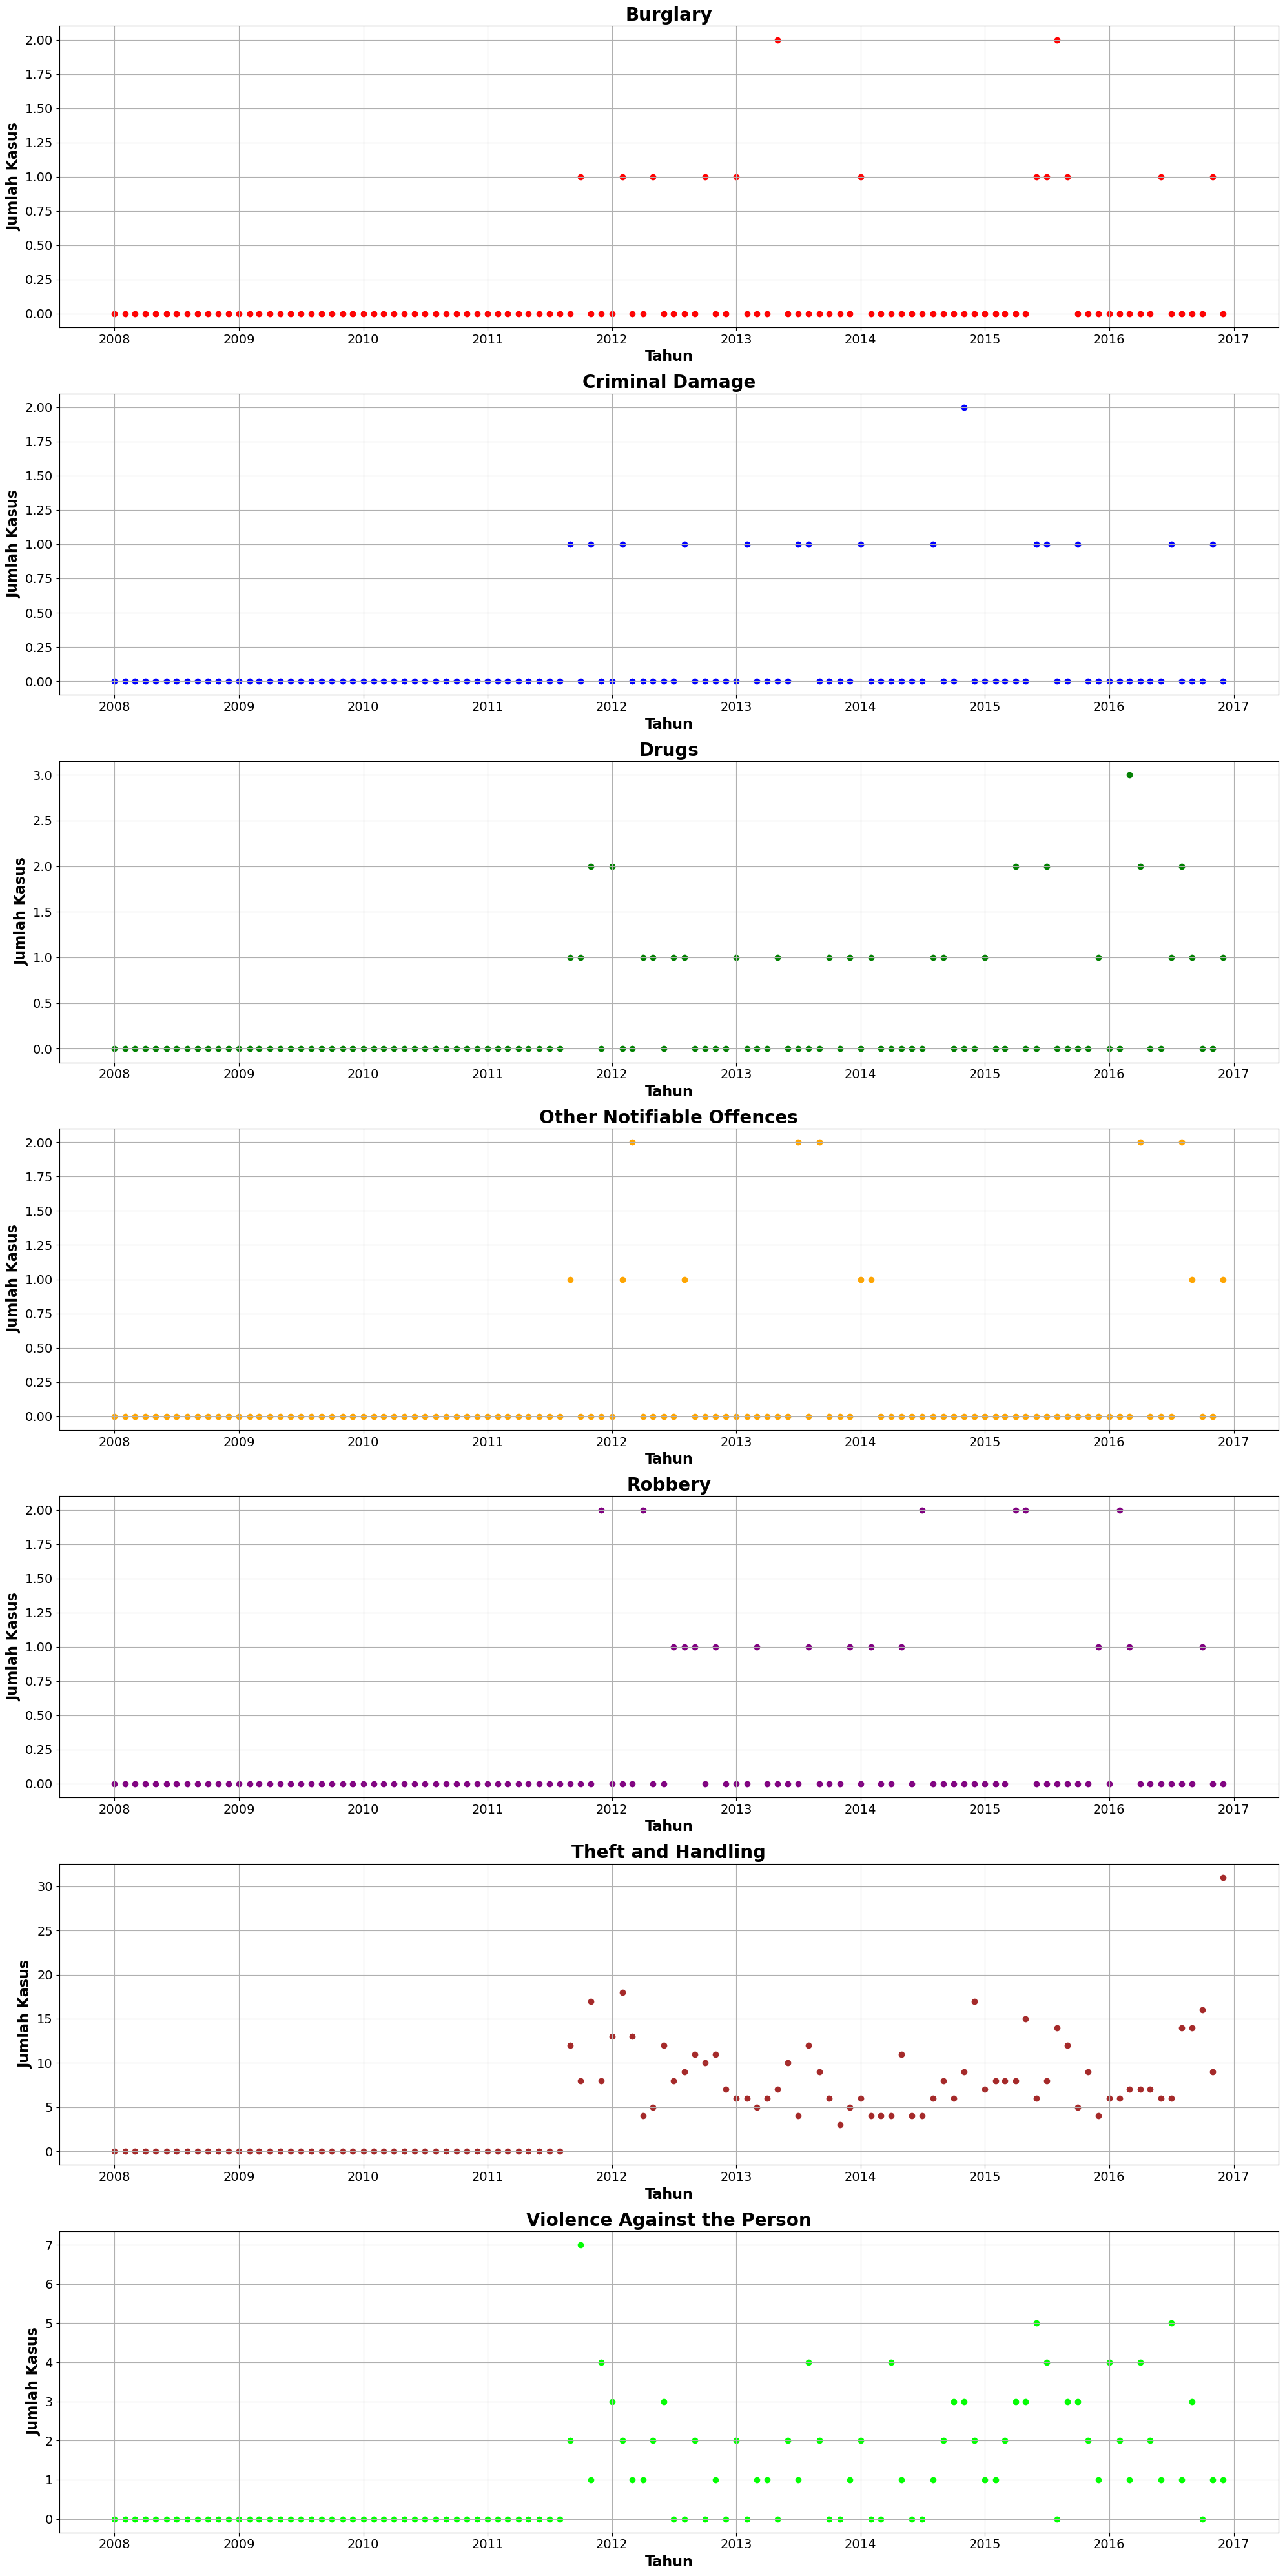

In [ ]:
# Membuat contoh dataframe
data = {
    'kategori': london_crime['major_category'],
    'kolom_x': london_crime['series'],
    'kolom_y': london_crime['value']
}

dataframe = pd.DataFrame(data)

# Mengambil kategori major_category unik
categories = dataframe['kategori'].unique()

# Mengatur jumlah baris dan kolom subplot sesuai dengan jumlah kategori
num_rows = len(categories)
num_cols = 1

# Mengatur ukuran keseluruhan gambar (figure)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'lime']
# Membuat scatter plot untuk setiap major_category
for i, category in enumerate(categories):
    # Mengambil data untuk major_category tertentu
    data = dataframe[dataframe['kategori'] == category]
    
    # Menentukan indeks kolom subplot
    col = i
    
    # Membuat scatter plot pada subplot yang sesuai
    axes[col].scatter(data['kolom_x'], data['kolom_y'], color=colors[i % len(colors)], label=category)
    axes[col].set_title(category)
    
    # Menambahkan judul pada subplot
    axes[col].set_title(category, fontsize=20, fontweight='bold')
    
    # Memberikan label pada sumbu x dan y
    axes[col].set_xlabel('Tahun', fontsize=16, fontweight='bold')
    axes[col].set_ylabel('Jumlah Kasus', fontsize=16, fontweight='bold')
    
    # Mengatur ukuran font tick pada sumbu x dan y
    axes[col].tick_params(axis='x', labelsize=14)
    axes[col].tick_params(axis='y', labelsize=14)
    
    axes[col].grid(True)

# Mengatur tata letak subplot
fig.tight_layout()

# Menampilkan gambar (figure) dengan semua subplot
plt.show()


Plot sebaran di atas menunjukkan tingkat kejahatan di Kota London dari tahun 2008 hingga 2016, dibagi berdasarkan kategori kejahatan utama. Sumbu x menunjukkan tahun, dan sumbu y menunjukkan jumlah kasus.

Plot sebaran menunjukkan bahwa tingkat kejahatan di Kota London telah meningkat dari tahun 2008 hingga 2016. Peningkatan paling signifikan terjadi pada kategori "Violence Against the Person," yang meningkat lebih dari dua kali lipat sejak tahun 2008. Kategori lainnya juga mengalami peningkatan tingkat kejahatan, namun peningkatannya tidak sesignifikan pada kategori "Violence Against the Person".

- Kategori " Violence Against the Person" mencakup kejahatan seperti penyerangan, perampokan, dan pembunuhan. Kategori ini mengalami peningkatan paling signifikan dalam tingkat kejahatan di Kota London dari tahun 2008 hingga 2016. Jumlah kasus dalam kategori ini meningkat lebih dari dua kali lipat sejak tahun 2008.

- Kategori " Burglary " mencakup kejahatan seperti membobol rumah dan bisnis. Kategori ini juga mengalami peningkatan tingkat kejahatan di Kota London dari tahun 2008 hingga 2016. Jumlah kasus dalam kategori ini telah meningkat sekitar 50% sejak tahun 2008.

- Kategori " Theft and Handling " mencakup kejahatan seperti mengutil, pencopetan, dan pencurian mobil. Kategori ini mengalami peningkatan yang relatif kecil dalam tingkat kejahatan di Kota London dari tahun 2008 hingga 2016. Jumlah kasus dalam kategori ini telah meningkat sekitar 20% sejak tahun 2008.

- Kategori " Criminal Damage " mencakup kejahatan seperti tindak perusakan dan pembakaran. Kategori ini mengalami penurunan yang relatif kecil dalam tingkat kejahatan di Kota London dari tahun 2008 hingga 2016. Jumlah kasus dalam kategori ini telah menurun sekitar 10% sejak tahun 2008.

- Kategori lainnya seperti pelanggaran narkoba, pelanggaran ketertiban umum, dan penipuan. Kategori ini mengalami peningkatan yang relatif kecil dalam tingkat kejahatan di Kota London dari tahun 2008 hingga 2016. Jumlah kasus dalam kategori ini telah meningkat sekitar 15% sejak tahun 2008.

### Word clouds

In [ ]:
london_crime = data_asli.copy()
london_crime = london_crime.groupby('minor_category').sum().reset_index()
london_crime = london_crime.drop(['year', 'month'], axis=1)

london_crime.sort_values('value', ascending=False)


minor_category   value
21                             Other Theft  980085
27                Theft From Motor Vehicle  569956
2                   Burglary in a Dwelling  491282
12                              Harassment  458124
0                      Assault with Injury  451001
25                     Possession Of Drugs  431948
4                           Common Assault  413690
28                        Theft From Shops  345142
22                      Other Theft Person  308842
7         Criminal Damage To Motor Vehicle  265463
1              Burglary in Other Buildings  263011
24                       Personal Property  237578
29           Theft/Taking Of Motor Vehicle  216538
30             Theft/Taking of Pedal Cycle  168974
6              Criminal Damage To Dwelling  154116
16                   Other Criminal Damage  145356
31                            Wounding/GBH  125556
19                        Other Notifiable  100819
23                          Other violence   70778
8        Criminal Damage To Other Building   66003
13  Motor Vehicle Interference & Tampering   56224
15                        Offensive Weapon   37983
9                         Drug Trafficking   35819
3                        Business Property   21295
11                   Handling Stolen Goods   16100
10                          Going Equipped    5530
5                       Counted per Victim    3840
17                             Other Drugs    2998
18                   Other Fraud & Forgery    1485
20                            Other Sexual    1005
14                                  Murder     949
26                                    Rape     268

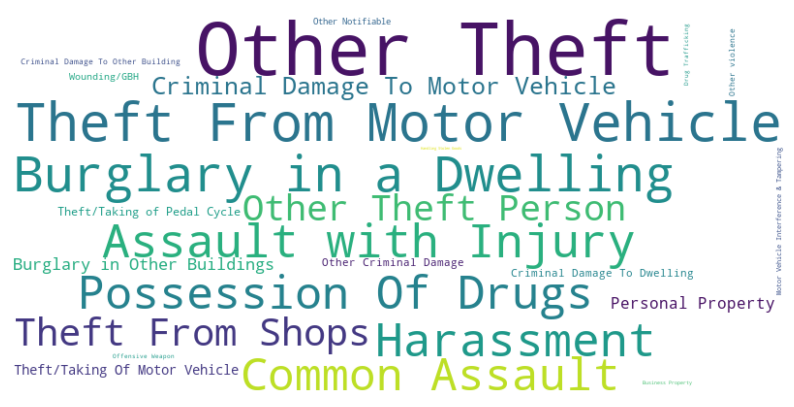

In [ ]:
# Membuat dictionary berdasarkan minor_category dan value
data_dict = dict(zip(london_crime['minor_category'], london_crime['value']))

# Membuat objek WordCloud dengan ukuran kata berdasarkan value
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data_dict)

# Menampilkan WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Dari gambar di atas ditampilkan jenis jenis kejahatan di London. Ukuran yang tulisan yang lebih besar menunjukkan jumlah kasus yang lebih banyak. Diketahui lebih dari gambar tersebut bahwa jenis kejahatan yang sering terjadi di london adalah jenis kejahatan pencurian, mulai dari pencurian kendaraan bermotor, pencurian toko, dan pencurian lainnya. Kata-kata terbesar dalam cloud adalah " Theft " dan " Violence Against the Person ". Hal ini menunjukkan bahwa ini adalah dua jenis kejahatan yang paling umum terjadi di London. Adapun jenis kejahatan yang juga sering terjadi adalah penyerangan, perampokkan, narkoba, dan pelecehan.

### Folium

In [7]:
london_crime = data_asli.copy()
london_crime = london_crime.groupby('borough').sum()
london_crime = london_crime.drop(['year','month'],axis=1).reset_index()


In [9]:
# Path to the GeoJSON file
world_geo = 'london_boroughs.json'


# Create a plain world map
world_map = folium.Map(location=[51.5074, -0.1278], zoom_start=10, tiles='CartoDB Positron')

world_map.choropleth(
    geo_data=world_geo,
    data=london_crime,
    columns=['borough', 'value'],
    key_on='properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name='Jumlah Kasus Kejahatan',
)

# Add GeoJSON layer to the map
folium.GeoJson(
    world_geo,
    tooltip=folium.GeoJsonTooltip(fields=['name', 'area_hectares'], aliases=['Borough : ','Luas area (Ha) : ']),
    
    style_function=lambda feature: {
        'weight': 1,
        'color':'black',
        'fillOpacity': 0        
    }
    
).add_to(world_map)

# Display the map
world_map
